**<h1 align="center"> Univariate Linear Regression </h1>**

### Task 1: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
My_Data = pd.read_csv("bike_sharing_data.txt")

### Task 2: Understand the Data
---

In [4]:
My_Data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
My_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
My_Data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Task 3: Visualize the Data
---

Before starting on any task, it is often useful to understand the data by visualizing it.

For this dataset, we can use a scatter plot using Seaborn to visualize the data, since it has only two variables: the profit and population.


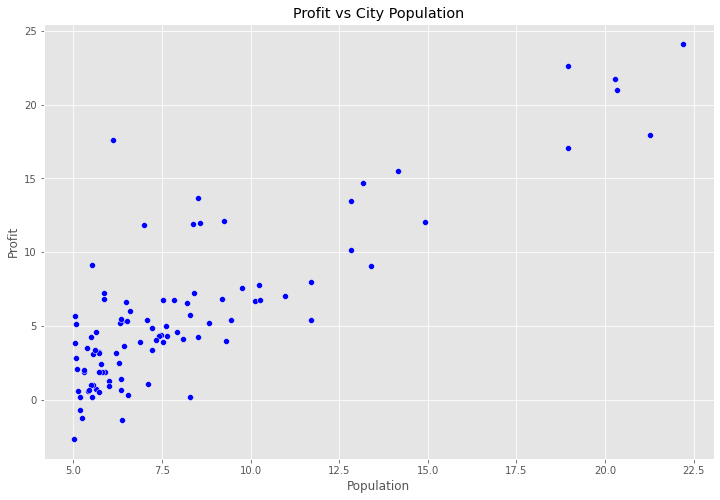

In [7]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = My_Data, color = "blue")
ax.set_title("Profit vs City Population");

### Task 4: Compute the Cost $J(\theta)$
---

Let’s now take a look at the machinery that powers linear regression: Gradient Descent. 

We want to fit the linear regression parameters 𝜃 to our dataset using gradient descent.

We can think of the cost as the error your model made in estimating a value.

The objective of linear regression is to minimize the cost function J(𝜃) :

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [8]:
def Cost_Function(x, y, theta):
  m = len(y)
  y_pred = x.dot(theta)
  error = (y_pred-y)**2
  return 1/(2*m)*np.sum(error)

In [9]:
m = My_Data.Population.values.size
X = np.append(np.ones((m, 1)), My_Data.Population.values.reshape(m, 1), axis = 1)
Y = My_Data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))
Cost_Function(X, Y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Recall that the parameters of our model are the 𝜃_j values.
These are the values we will adjust to minimize the cost J(𝜃).
One way to do this is to use the batch gradient descent algorithm.
In batch gradient descent, each iteration performs the following update.
With each step of gradient descent, the parameters 𝜃_j come closer to the optimal values that will achieve the lowest cost J(𝜃).

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [10]:
def Gradient_Descent(X, Y, theta, alpha, iterations):
  m = len(Y)
  costs = []
  for i in range(iterations):
    Y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (Y_pred-Y))
    theta -= alpha*(1/m)*error
    costs.append(Cost_Function(X, Y, theta))
  return theta, costs

In [11]:
theta, costs = Gradient_Descent(X, Y, theta, alpha = 0.01, iterations = 2000)

In [12]:
print("hθ(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                 str(round(theta[1, 0], 2))))

hθ(x) = -3.79 + 1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

To better understand the cost function J(𝜃), we will plot the cost over a 2-dimensional grid of 𝜃_0 and 𝜃_1 values.

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_value = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_value[i, j] = Cost_Function(X, Y, t)

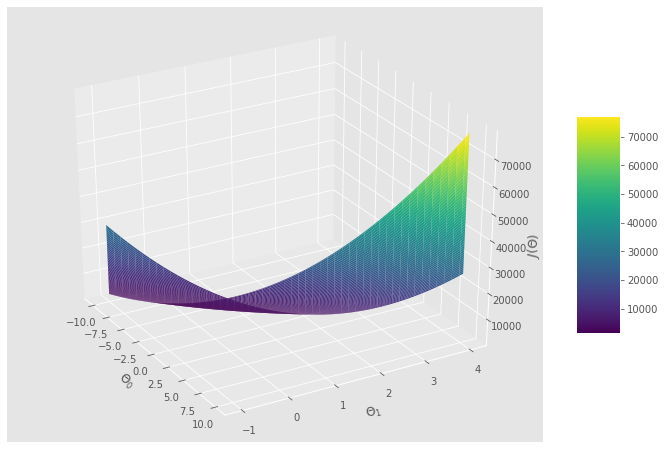

In [15]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = "3d")

surf = ax.plot_surface(theta_0, theta_1, cost_value, cmap = "viridis")
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

The purpose of this graph is to show you how J(𝜃) varies with changes in 𝜃_0 and 𝜃_1.
We can see that the cost function J(𝜃) is bowl-shaped and has a global minimum. 

### Task 7: Plotting the Convergence
---

Let’s plot how the cost function varies with the number of iterations.
When we ran gradient descent previously, it returns the history of J(𝜃) values in a vector “costs”.
We will now plot the J values against the number of iterations.

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the cost function')

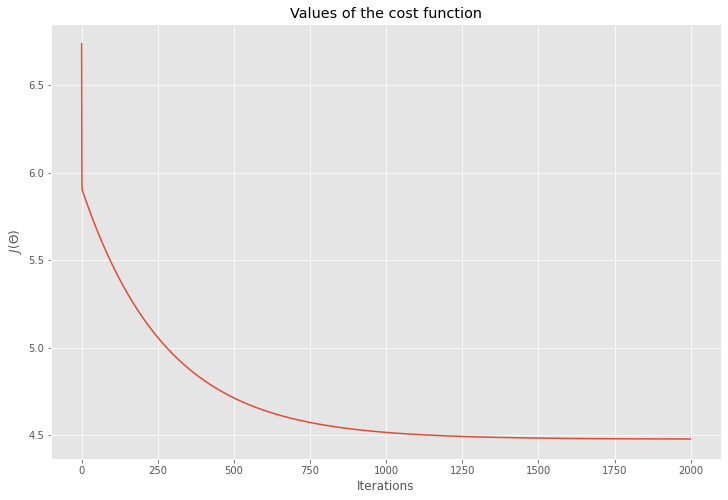

In [16]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the cost function")


### Task 8: Training Data with Linear Regression Fit
---

Now that we have correctly implemented and run gradient descent and arrived at the final parameters of our model, we can use these parameters to plot the linear fit. 

In [17]:
theta.shape

(2, 1)

In [18]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


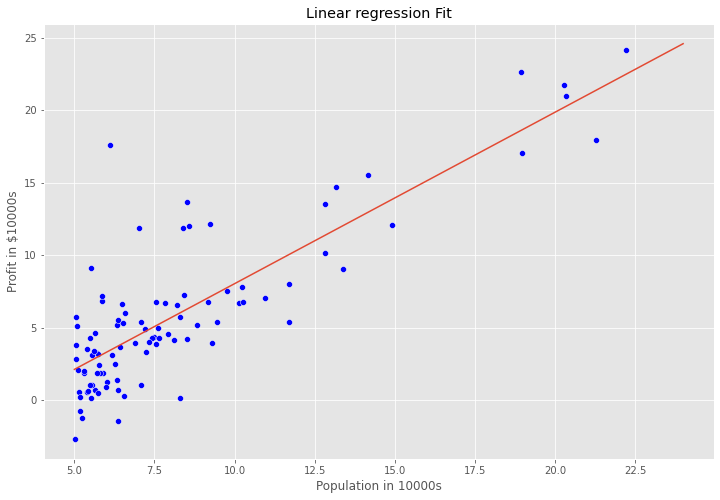

In [19]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y = "Profit", data = My_Data, color = "blue")

x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear regression Fit");

### Task 9: Inference using the optimized $\theta$ values
---

In this final task, let’s use our final values for 𝜃 to make predictions on profits in cities of 35,000 and 70,000 people. 

$h_\theta(x) = \theta^Tx$

In [20]:
def predict(x, theta):            #hypothesis
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [21]:
y_pred1 = predict(np.array([1, 4]), theta)*10000
print("For a population of 40000 people the model predicts a profit of "+ str(round(y_pred1, 0)))

For a population of 40000 people the model predicts a profit of 9408.0


In [22]:
y_pred2 = predict(np.array([1, 8.3]), theta)*10000
print("For a population of 40000 people the model predicts a profit of "+ str(round(y_pred2, 0)))

For a population of 40000 people the model predicts a profit of 60243.0
